# Set up

In [ ]:
#pip install lime


In [ ]:
#pip install --upgrade imbalanced-learn scikit-learn numpy

Python librairies imports :

In [1]:
# File system management
import os
import pickle
import dill

from collections import Counter

# Data manipulation
import numpy as np
import pandas as pd
import mlflow
from mlflow import log_metric, log_param, log_artifacts

# Scikit-learn
from sklearn.model_selection import cross_val_predict, cross_validate, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler 

# Hyperparameters optimisation
from hyperopt import tpe, hp, fmin, space_eval, STATUS_OK, Trials, SparkTrials 
from hyperopt.pyll.base import scope


# LightGBM
import lightgbm as ltb

# Balancing data
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Interpratability
from lime import lime_tabular
import shap

# Data drift
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(palette="Set1")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Define work location :

In [2]:
project_path = "/Users/FM/OpenClassrooms/Projet 7"

# Change directory
os.chdir(project_path)

Load data :

In [3]:
# Load data
data = pd.read_csv("train_feature_engineering.csv", index_col=[0])
data_test = pd.read_csv("test_feature_engineering.gzip", compression='gzip', index_col=[0])


In [4]:
display(data)
display(data_test)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR
0,1.0,0,0,0,0,0,202500.0,406597.5,24700.5,0.018801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0,1,0,1,0,270000.0,1293502.5,35698.5,0.003541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,1,0,1,0,0,67500.0,135000.0,6750.0,0.010032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0,1,0,0,0,135000.0,312682.5,29686.5,0.008019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,0,0,0,0,121500.0,513000.0,21865.5,0.028663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,0,0,0,1,0,157500.0,254700.0,27558.0,0.032561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,0.0,0,1,0,0,0,72000.0,269550.0,12001.5,0.025164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,0.0,0,1,0,0,0,153000.0,677664.0,29979.0,0.005002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,1.0,0,1,0,0,0,171000.0,370107.0,20205.0,0.005313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR
307511,0,1,0,0,0,135000.0,568800.0,20560.5,0.018850,-19241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307512,0,0,0,0,0,99000.0,222768.0,17370.0,0.035792,-18064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307513,0,0,1,0,0,202500.0,663264.0,69777.0,0.019101,-20038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307514,0,1,0,0,2,315000.0,1575000.0,49018.5,0.026392,-13976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307515,0,0,1,1,1,180000.0,625500.0,32067.0,0.010032,-13040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,0,1,0,0,0,121500.0,412560.0,17473.5,0.002042,-19970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356251,0,1,0,1,2,157500.0,622413.0,31909.5,0.035792,-11186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356252,0,1,1,0,1,202500.0,315000.0,33205.5,0.026392,-15922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356253,0,0,0,1,0,225000.0,450000.0,25128.0,0.018850,-13968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Functions

- Étape Comparaison des performances
- Comparer les performances des différents modèles en fonction de :
- La métrique de score métier (business score).
- L'exactitude (accuracy).
- La précision (precision).
- Le rappel (recall).
- Le score F1.
- L'AUC score.

In [5]:
# Function to display confusion matrix
def display_confusion_matrix(y_test, y_pred, model_name="Model"):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(model_name + ": Confusion matrix")
    plt.grid(visible=None)
    plt.show()

In [6]:
# Function to compute roc curve
def compute_roc_curve(y_test, y_pred_proba, model_name="Model", disp_best_th=False):
    # Compute metrics
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Create fig
    plt.figure()
    plt.title(model_name + ": ROC curve")

    # Display x=y
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--')

    # Display ROC curve
    sns.lineplot(x=fpr, y=tpr, legend='brief', label="AUC = {:.3f}".format((auc)))

    if disp_best_th is True:
        # Compute best threshold
        o_tpr = tpr[np.argmin(np.abs(fpr+tpr-1))]
        o_fpr = fpr[np.argmin(np.abs(fpr+tpr-1))]
        o_threshold = thresholds[np.argmin(np.abs(fpr+tpr-1))]

        # Display best threshold
        sns.scatterplot(x=[o_fpr], y=[o_tpr], legend='brief', label="Best threshold = {:.3f}".format(o_threshold))

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

    # Return AUC score
    return auc

In [7]:
# Return the best model from hyperopt trials
def trials_best_model(trials):
    valid_trial_list = [trial for trial in trials
                            if STATUS_OK == trial['result']['status']]
    losses = [float(trial['result']['loss']) for trial in valid_trial_list]
    min_loss_idx = np.argmin(losses)
    best_trial_obj = valid_trial_list[min_loss_idx]
    print("Best result :", best_trial_obj['result']['loss'])
    return best_trial_obj['result']['model']

# MLFlow

Set up of MLFlow tracking.

In [8]:
# mlflow server --host 127.0.0.1 --port 8002 dans le terminal
# mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

In [9]:
# Configuration de l'URI de suivi pour MLflow
mlflow.set_tracking_uri(uri="http://127.0.0.1:8003")


In [10]:

# Créer l'expérience
experiment_name = 'credit_scoring'
mlflow.set_experiment(experiment_name)
mlflow.end_run()


#### Définition des fonctions log_mlflow et compute_classification_results

In [11]:
# Fonction pour enregistrer le modèle dans MLflow

def log_mlflow(model, name, custom_score, n_estimator,learning_rate, max_depth=None, auc_score=None, f1_score=None, acc_score=None,
               train_class_0=None, train_class_1=None):

    # Suivi des paramètres et des métriques
    with mlflow.start_run():
        # Définir le nom de la course
        mlflow.set_tag("mlflow.runName", name)

        # Définir les paramètres
        mlflow.log_param("n_estimators", n_estimator)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("train_class_0", train_class_0)
        mlflow.log_param("train_class_1", train_class_1)

        # Définir les métriques
        mlflow.log_metric("Custom score", custom_score)
        mlflow.log_metric("AUC", auc_score)
        mlflow.log_metric("F1", f1_score)
        mlflow.log_metric("Accuracy", acc_score)

        # Enregistrer le modèle dans les artefacts
        mlflow.sklearn.log_model(model, name)

    mlflow.end_run()



# Data preparation

In [12]:
# Define target and features/Définir la cible et les fonctionnalités
TARGET = 'TARGET'
target = data[TARGET].to_numpy()
features = data.drop(columns=TARGET).to_numpy()
features_names = data.drop(columns=TARGET).columns.to_list()

# Define training set size
TRAIN_SIZE = 0.8

# Define random state
RANDOM_STATE = 42

## Missing values

In [13]:
# Check missing values
nan_values = data.isna().sum().sum()
print("Missing values = {} ({:.2%})".format(nan_values, nan_values/data.size))

Missing values = 37539165 (20.11%)


I fill the missing values with a simple imputer.

In [14]:
# Create imputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit to data
imp_mean.fit(features)

# Transform data
features_fill = imp_mean.transform(features)

## Split data

I split the data into training and testing sets.

In [15]:
# Split dataset (filled)
x_train, x_test, y_train, y_test = train_test_split(features_fill, target, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [16]:
# Define stratifiedKfold
strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

## Balance data

In [17]:
# Compter les valeurs cibles dans l'ensemble d'entraînement
y_train_counter = Counter(y_train)
print("Training target statistics:", y_train_counter)
print("Testing target statistics:", Counter(y_test))

# Print ratio
print("Ratio is 1:{:.0f}".format(y_train_counter[0] / y_train_counter[1]))

Training target statistics: Counter({0.0: 226201, 1.0: 19804})
Testing target statistics: Counter({0.0: 56481, 1.0: 5021})
Ratio is 1:11


I will define a pipeline that first transforms the training dataset with SMOTE then fits the model.

In [18]:
# Define oversampling and undersampling
over = SMOTE(sampling_strategy=0.5) # oversample to 1:2 ratio 
under = RandomUnderSampler(sampling_strategy=1) # undersample to 1:1 ratio

# Define pipeline
steps = [('over', over), ('under', under)]
# steps = [('over', over)]
pipeline = Pipeline(steps = steps)

# Transform the dataset
x_res, y_res = pipeline.fit_resample(x_train, y_train)

print("Training target statistics:", Counter(y_res))
print("Testing target statistics:", Counter(y_test))

Training target statistics: Counter({0.0: 113100, 1.0: 113100})
Testing target statistics: Counter({0.0: 56481, 1.0: 5021})


In [19]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


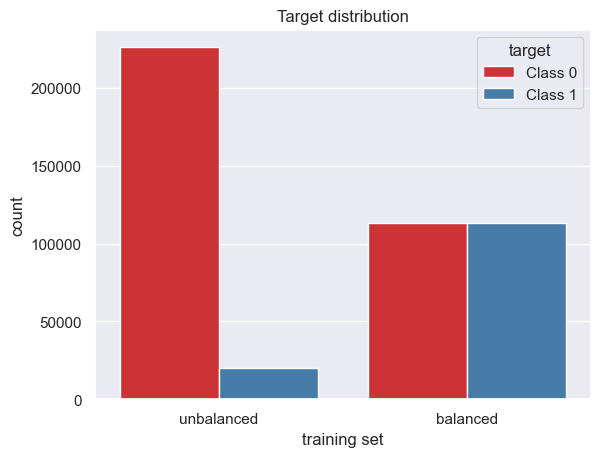

In [20]:
# Display barplot of distribution
class_distr_df = pd.DataFrame({'training set': ['unbalanced', 'unbalanced', 'balanced', 'balanced'],
                               'target': ['Class 0', 'Class 1', 'Class 0', 'Class 1'],
                               'count': [y_train_counter[0], y_train_counter[1], Counter(y_res)[0], Counter(y_res)[1]]})

# Display barplot
sns.barplot(data=class_distr_df, x='training set', y='count', hue='target')
plt.title("Target distribution")
plt.show()

## Custom loss function

Rule : cost FN (dont repay - predicted as repay) = 10 cost FP (repay - predicted as dont repay)

In [21]:
# Définir la fonction de perte personnalisée
def business_loss_func(y_true, y_pred):
    FN = sum((y_true == 1) & (y_pred == 0))
    FP = sum((y_true == 0) & (y_pred == 1))
    cost = 10 * FN + FP
    return (cost)


I create custom scorer with the business rule.

In [22]:
# Create business score
business_score = make_scorer(business_loss_func, greater_is_better = False)

# Classification

In [23]:

# Fonction pour calculer les prédictions et les métriques
def compute_classification_results(model, model_name, x_test, y_test):

    # Prédire la probabilité de la classe 1 (défaut de remboursement)
    y_pred_proba = model.predict_proba(x_test)[:,1]

    # Prédire les valeurs
    y_pred = model.predict(x_test)

    # Afficher la matrice de confusion
    display_confusion_matrix(y_test, y_pred, model_name = model_name)

    # Tracer la courbe ROC
    auc_score = compute_roc_curve(y_test, y_pred_proba, model_name = model_name)

    # Calculer les scores
    clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True)).transpose()
    display(clf_report)

    # Afficher la fonction de perte métier
    business_score = business_loss_func(y_test, y_pred)
    print("Business score =", business_score)

    return business_score, auc_score, clf_report

# DummyClassifier

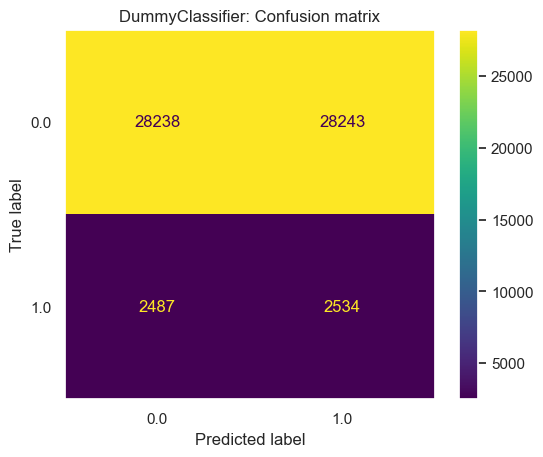

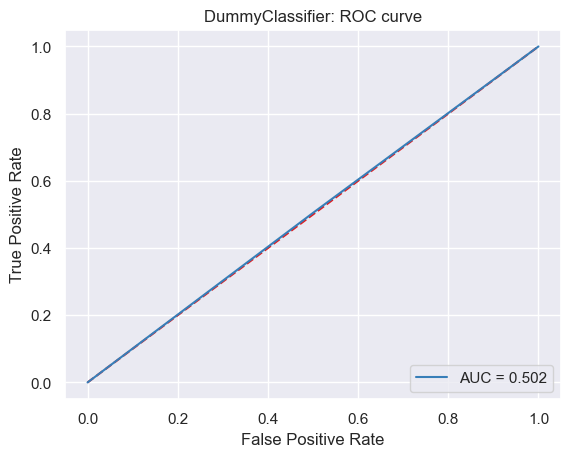

,precision,recall,f1-score,support
0.0,0.919056,0.499956,0.647616,56481.000000
1.0,0.082334,0.504680,0.141572,5021.000000
accuracy,0.500341,0.500341,0.500341,0.500341
macro avg,0.500695,0.502318,0.394594,61502.000000
weighted avg,0.850746,0.500341,0.606303,61502.000000


Business score = 53113


Setuptools is replacing distutils.


In [25]:
# Create logistic regression model
dc = DummyClassifier(strategy='stratified', random_state = RANDOM_STATE)
dc_name = 'DummyClassifier'

# Fit model
dc.fit(x_res, y_res)

# Compute results
dc_business_score, dc_auc, dc_report = compute_classification_results(dc, dc_name, x_test, y_test)

# Save logs
log_mlflow(dc, dc_name, auc_score = dc_auc, custom_score = dc_business_score,
           f1_score = dc_report.loc['weighted avg', 'f1-score'], 
           acc_score = dc_report.loc['accuracy', 'precision'],
           train_class_0=Counter(y_res)[0], train_class_1=Counter(y_res)[1],
           n_estimator = None, learning_rate = None)

# LogisticRegression

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


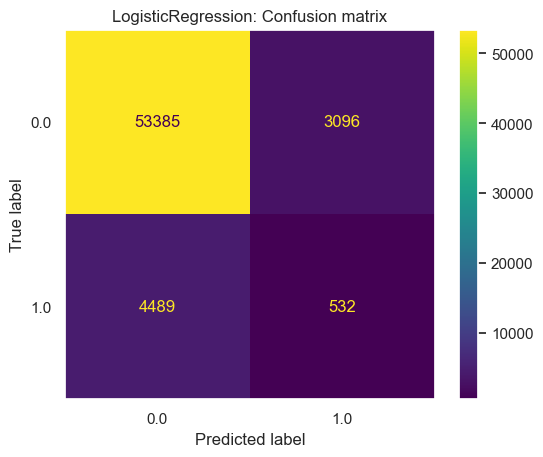

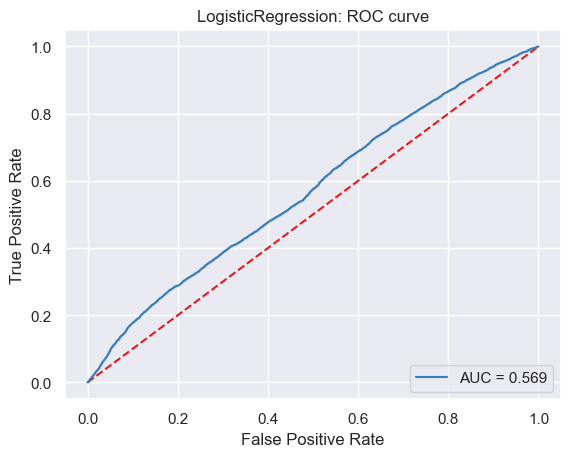

,precision,recall,f1-score,support
0.0,0.922435,0.945185,0.933671,56481.000000
1.0,0.146637,0.105955,0.123020,5021.000000
accuracy,0.876671,0.876671,0.876671,0.876671
macro avg,0.534536,0.525570,0.528346,61502.000000
weighted avg,0.859099,0.876671,0.867490,61502.000000


Business score = 47986
CPU times: user 3min 17s, sys: 4.02 s, total: 3min 21s
Wall time: 3min 14s


In [26]:
%%time

# Create logistic regression model
lr = LogisticRegression(random_state=RANDOM_STATE)
lr_name = 'LogisticRegression'

# Train model
lr.fit(x_res, y_res)

# Compute results
lr_business_score, lr_auc, lr_report = compute_classification_results(lr, lr_name, x_test, y_test)

# Save logs
log_mlflow(lr, lr_name, auc_score=lr_auc, custom_score=lr_business_score,
           f1_score=lr_report.loc['weighted avg', 'f1-score'], 
           acc_score=lr_report.loc['accuracy', 'precision'],
           train_class_0=Counter(y_res)[0], train_class_1=Counter(y_res)[1],
           n_estimator = None, learning_rate = None)

# Gradient Boosting

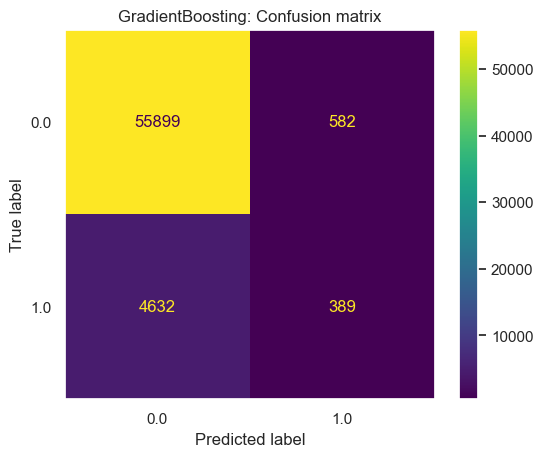

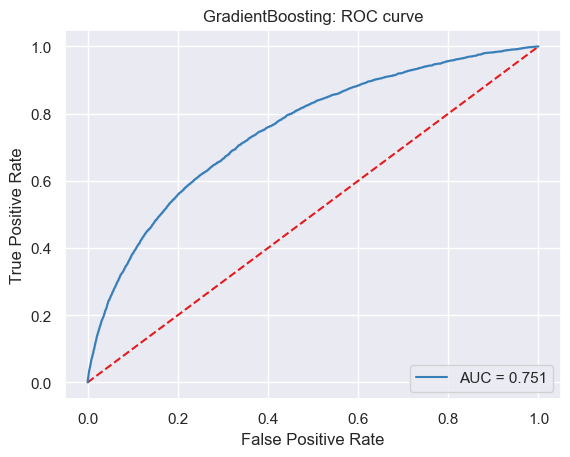

,precision,recall,f1-score,support
0.0,0.923477,0.989696,0.955440,56481.000000
1.0,0.400618,0.077475,0.129840,5021.000000
accuracy,0.915222,0.915222,0.915222,0.915222
macro avg,0.662048,0.533585,0.542640,61502.000000
weighted avg,0.880791,0.915222,0.888039,61502.000000


Business score = 46902
CPU times: user 46min 20s, sys: 21.1 s, total: 46min 41s
Wall time: 56min 43s


In [27]:

%%time

# Create Gradient Boosting model

gb = GradientBoostingClassifier(random_state = RANDOM_STATE)
gb_name = 'GradientBoosting'

# Fit model
gb.fit(x_res, y_res)

# Compute results
gb_business_score, gb_auc, gb_report = compute_classification_results(gb, gb_name, x_test, y_test)

# Save logs
log_mlflow(gb, gb_name, auc_score = gb_auc, custom_score = gb_business_score,
           f1_score = gb_report.loc['weighted avg', 'f1-score'], 
           acc_score = gb_report.loc['accuracy', 'precision'],
           train_class_0 = Counter(y_res)[0], train_class_1 = Counter(y_res)[1],
           n_estimator = gb.n_estimators, learning_rate = gb.learning_rate)


# LightGBM

[LightGBM] [Info] Number of positive: 113100, number of negative: 113100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.695516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 134961
[LightGBM] [Info] Number of data points in the train set: 226200, number of used features: 569
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


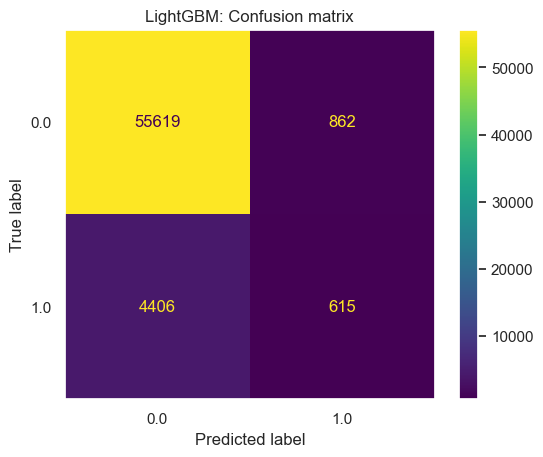

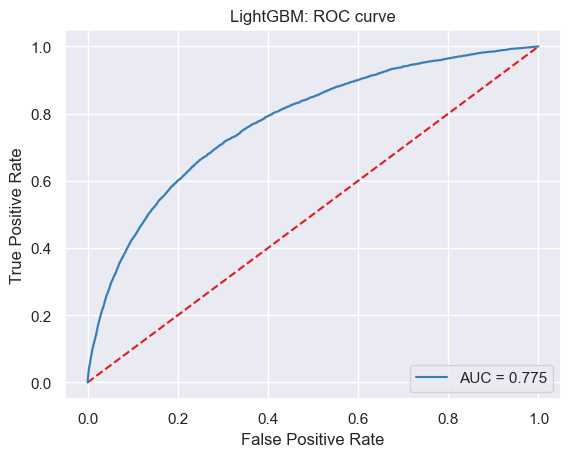

,precision,recall,f1-score,support
0.0,0.926597,0.984738,0.954783,56481.000000
1.0,0.416385,0.122486,0.189289,5021.000000
accuracy,0.914344,0.914344,0.914344,0.914344
macro avg,0.671491,0.553612,0.572036,61502.000000
weighted avg,0.884944,0.914344,0.892289,61502.000000


Business score = 44922
CPU times: user 3min 48s, sys: 5.55 s, total: 3min 54s
Wall time: 3min 56s


In [28]:
%%time

# Create LightGBM classifier
lgbm = ltb.LGBMClassifier(random_state = RANDOM_STATE)
lgbm_name = 'LightGBM'

# Train model
lgbm.fit(x_res, y_res)

# Compute results
lgbm_business_score, lgbm_auc, lgbm_report = compute_classification_results(lgbm, lgbm_name, x_test, y_test)

# Save logs
lgbm_params = lgbm.get_params()
log_mlflow(lgbm, lgbm_name,
           custom_score = lgbm_business_score,
           auc_score = lgbm_auc,
           f1_score = lgbm_report.loc['weighted avg', 'f1-score'], 
           acc_score=lgbm_report.loc['accuracy', 'precision'],
           n_estimator = lgbm_params['n_estimators'],
           learning_rate = lgbm_params['learning_rate'],
           max_depth = lgbm_params['max_depth'], 
           train_class_0 = Counter(y_res)[0],
           train_class_1 = Counter(y_res)[1])

# Comparison

In [29]:
# Create results dataframe
res_df = pd.DataFrame({
    'Model':['Dummy', 'LogisticRegression','GradientBoosting', 'LightGBM'],
    'Business score': [dc_business_score, lr_business_score, gb_business_score, lgbm_business_score],
    'Accuracy': [dc_report.loc['accuracy', 'precision'],
                 lr_report.loc['accuracy', 'precision'],
                 gb_report.loc['accuracy', 'precision'], # Correction de 'accruracy' à 'accuracy'
                 lgbm_report.loc['accuracy', 'precision']],
    'Precision': [dc_report.loc['macro avg', 'precision'],
                 lr_report.loc['macro avg', 'precision'],
                  gb_report.loc['macro avg', 'precision'],
                 lgbm_report.loc['macro avg', 'precision']],
    'Recall': [dc_report.loc['macro avg', 'recall'],
               lr_report.loc['macro avg', 'recall'],
               gb_report.loc['macro avg', 'recall'],
               lgbm_report.loc['macro avg', 'recall']],
    'F-1 score': [dc_report.loc['macro avg', 'f1-score'],
                  lr_report.loc['macro avg', 'f1-score'],
                  gb_report.loc['macro avg', 'f1-score'],
                 lgbm_report.loc['macro avg', 'f1-score']],
    'AUC score': [dc_auc, lr_auc, gb_auc, lgbm_auc], # Correction de 'rf_auc, xgbc_auc' à 'gb_auc'
})

display(res_df)


,Model,Business score,Accuracy,Precision,Recall,F-1 score,AUC score
0,Dummy,53113,0.500341,0.500695,0.502318,0.394594,0.502318
1,LogisticRegression,47986,0.876671,0.534536,0.525570,0.528346,0.568711
2,GradientBoosting,46902,0.915222,0.662048,0.533585,0.542640,0.750547
3,LightGBM,44922,0.914344,0.671491,0.553612,0.572036,0.774573


**The best model regarding our business score is the LightGBM model.**
<br>I decide to select this model for the project. 

Let's tune its hyperparameters.

# Hyperparametrization

LightGBM tuning

[LightGBM] [Info] Number of positive: 75400, number of negative: 75400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.360997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 134757
[LightGBM] [Info] Number of data points in the train set: 150800, number of used features: 567
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 75400, number of negative: 75400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.075547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 133331
[LightGBM] [Info] Number of data points in the train set: 150800, number of used features: 567
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 75400, number of negative: 75400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.126891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 133331
[LightGBM] [Info] Number of data points in the train set: 150800, number of used features: 568
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 75400, number of negative: 75400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.963836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 133331
[LightGBM] [Info] Number of data points in the train set: 150800, number of used features: 567
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be 

[LightGBM] [Info] Number of positive: 75400, number of negative: 75400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.971663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 134757
[LightGBM] [Info] Number of data points in the train set: 150800, number of used features: 567
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 75400, number of negative: 75400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.125804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 75400, number of negative: 75400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.949545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 133331
[LightGBM] [Info] Number of data points in the train set: 150800, number of used features: 567
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 75400, number of negative: 75400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.010778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 133331
[LightGBM] [Info] Number of data points in the train set: 150800, number of used features: 568
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 75400, number of negative: 75400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.971120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 134757
[LightGBM] [Info] Number of data points in the train set: 150800, number of used features: 567
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 75400, number of negative: 75400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.954132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 133331
[LightGBM] [Info] Number of data points in the train set: 150800, number of used features: 568
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 75400, number of negative: 75400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.040631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 133331
[LightGBM] [Info] Number of data points in the train set: 150800, number of used features: 568
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

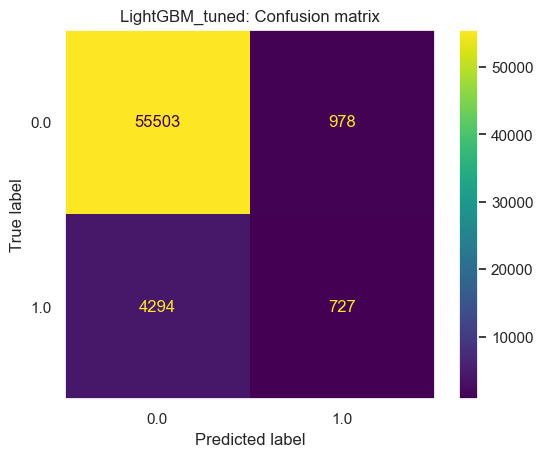

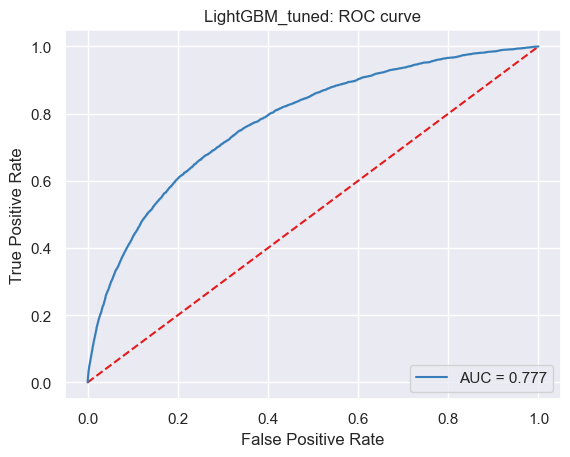

,precision,recall,f1-score,support
0.0,0.928190,0.982684,0.954660,56481.000000
1.0,0.426393,0.144792,0.216176,5021.000000
accuracy,0.914279,0.914279,0.914279,0.914279
macro avg,0.677292,0.563738,0.585418,61502.000000
weighted avg,0.887224,0.914279,0.894371,61502.000000


Business score = 43918


In [30]:
# LightGBM tuning with GridSearch

from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Create LightGBM classifier for tuning
lgbm = lgb.LGBMClassifier(random_state = RANDOM_STATE)

lgbm_name = 'LightGBM_tuned'

# Define hyperparameter grid
lgbm_param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200]
}

# Initialize GridSearchCV
lgbm_grid_search = GridSearchCV(estimator = lgbm, param_grid = lgbm_param_grid, scoring = business_score, cv = 3)

# Perform GridSearchCV
lgbm_grid_search.fit(x_res, y_res)

# Get best parameters and best model
lgbm_best_params = lgbm_grid_search.best_params_
lgbm_best_model = lgbm_grid_search.best_estimator_

print("Best Parameters:", lgbm_best_params)

# Train model
lgbm_best_model.fit(x_res, y_res)

# Compute results
lgbm_business_score, lgbm_auc, lgbm_report = compute_classification_results(lgbm_best_model, lgbm_name, x_test, y_test)

# Save logs
log_mlflow(lgbm_best_model, lgbm_name,
           custom_score = lgbm_business_score,
           auc_score = lgbm_auc,
           f1_score = lgbm_report.loc['weighted avg', 'f1-score'], 
           acc_score = lgbm_report.loc['accuracy', 'precision'],
           max_depth = lgbm_best_params['max_depth'],
           learning_rate = lgbm_best_params['learning_rate'],
           n_estimator = lgbm_best_params['n_estimators'],
           train_class_0 = Counter(y_res)[0],
           train_class_1 = Counter(y_res)[1])


The **LightGBM** tuned model is slightly better than the standard model (43832) but took more than one day of computation.

**I decide to keep the standard LightGBM model for this project.**

# Custom threshold

In [31]:
# Get proba predictions from lgbm model to be class 1 : repay failure
lgbm_proba = lgbm_best_model.predict_proba(x_test)[:, 1]


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


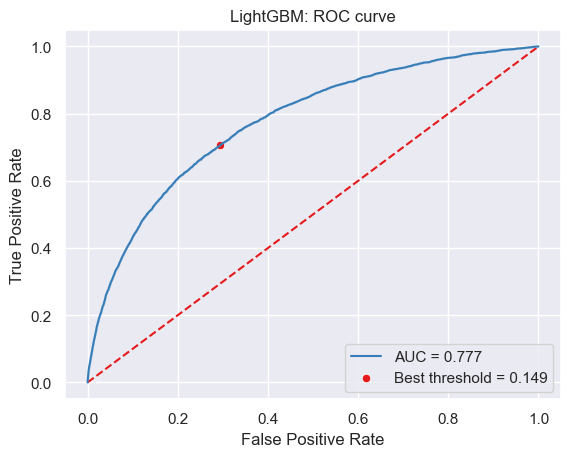

In [32]:
# Draw roc curve
auc_score = compute_roc_curve(y_test, lgbm_proba, model_name='LightGBM', disp_best_th=True)

# Explainer

## LIME

In [33]:
# Créer l'explorateur Lime
lime_explainer = lime_tabular.LimeTabularExplainer(x_res, mode="classification",
                                                   class_names=['REPAY SUCCESS', 'REPAY FAILURE'],
                                                   feature_names=features_names)


In [34]:

idx = 1001

print("Prédiction : ", lgbm_best_model.predict(x_test)[idx])
print("Actuel :     ", y_test[idx])

explanation = lime_explainer.explain_instance(x_test[idx], lgbm_best_model.predict_proba, num_features = 15) 

explanation.show_in_notebook()
explanation.as_list()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Prédiction :  0.0
Actuel :      1.0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[('NAME_EDUCATION_TYPE_Lower secondary > 0.00', -0.0059182975008081045),
 ('ORGANIZATION_TYPE_Trade: type 6 <= 0.00', 0.0049307231311402615),
 ('NAME_HOUSING_TYPE_Municipal apartment > 0.00', -0.002602079637927647),
 ('BURO_AMT_CREDIT_SUM_LIMIT_MEAN > 5901.52', -0.0018223625224767159),
 ('ORGANIZATION_TYPE_Industry: type 5 <= 0.00', -0.0011785936024924085),
 ('NAME_INCOME_TYPE_Maternity leave <= 0.00', -0.0008463864502730492),
 ('FLAG_DOCUMENT_17 <= 0.00', -0.0007371527454532562),
 ('ORGANIZATION_TYPE_Transport: type 1 <= 0.00', -0.0006471062308380254),
 ('ORGANIZATION_TYPE_Industry: type 10 <= 0.00', -0.0005473082241160081),
 ('FLAG_DOCUMENT_7 <= 0.00', -0.00044076001894464035),
 ('ORGANIZATION_TYPE_Industry: type 8 <= 0.00', -0.00019379766858605818),
 ('ORGANIZATION_TYPE_Telecom <= 0.00', -0.0001259069032632305),
 ('ORGANIZATION_TYPE_Trade: type 5 <= 0.00', 9.642240332881085e-05),
 ('FLAG_DOCUMENT_20 <= 0.00', 5.152204169107487e-05),
 ('OCCUPATION_TYPE_Realty agents <= 0.00', 2.68109

## SHAP

In [35]:
# Entraîner le modèle LightGBM
lgbm.fit(x_res, y_res)


[LightGBM] [Info] Number of positive: 113100, number of negative: 113100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.502559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 134961
[LightGBM] [Info] Number of data points in the train set: 226200, number of used features: 569
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [36]:
# Calculer les valeurs SHAP
shap_explainer = shap.TreeExplainer(lgbm, feature_names=features_names)  
shap_values = shap_explainer(x_res)
test_shap_values = shap_explainer(x_test)


In [37]:
print(type(shap_values[idx]))


<class 'shap._explanation.Explanation'>


 #### Utiliser shap.summary_plot 

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


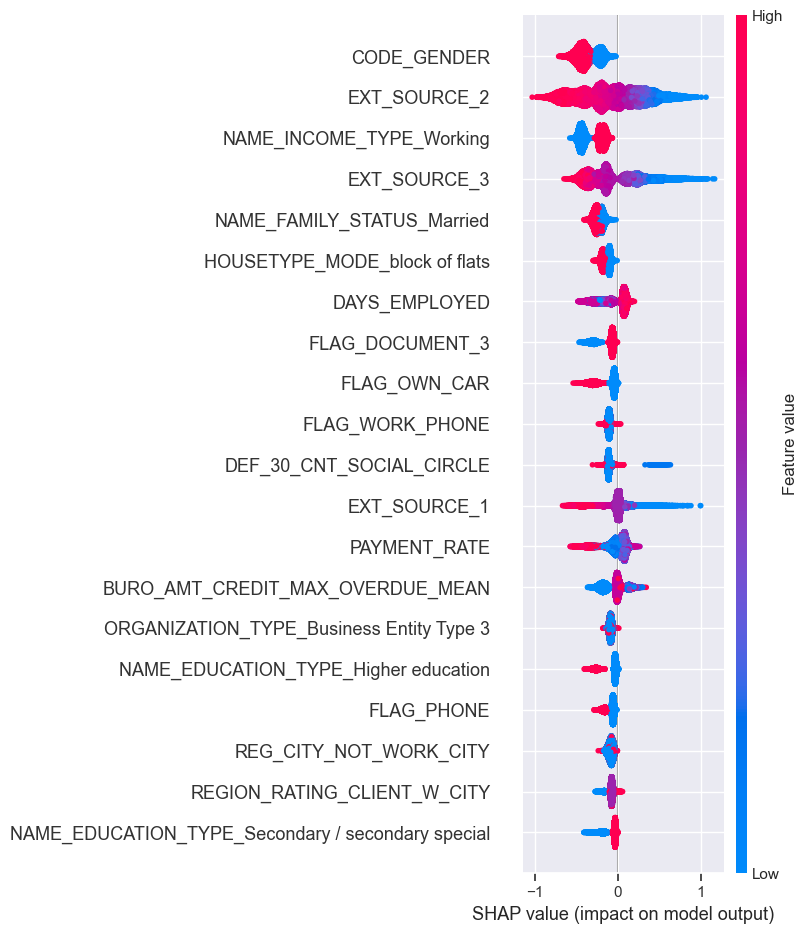

In [39]:
# Calculer les valeurs SHAP
shap_values = shap_explainer.shap_values(x_test)

# Afficher un résumé des valeurs SHAP
shap.summary_plot(shap_values[1], features = x_test, feature_names = features_names)


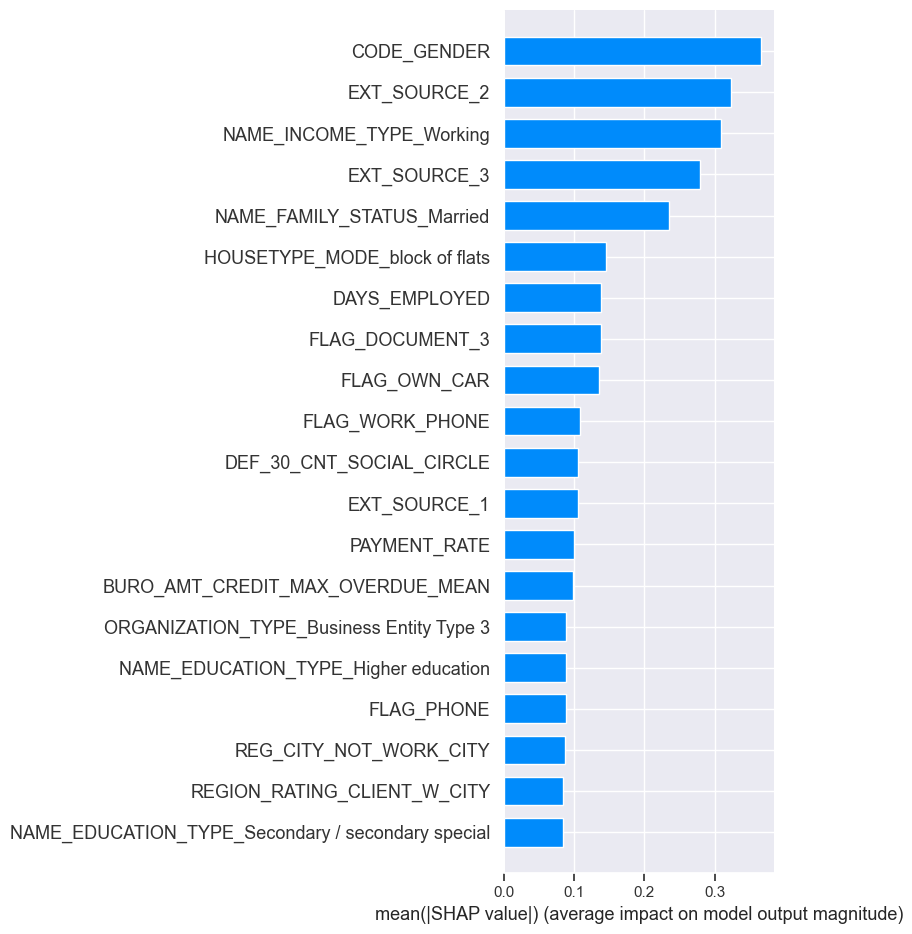

In [54]:
# Calculer les valeurs SHAP
shap_values = shap_explainer.shap_values(x_test)

# Afficher un résumé des valeurs SHAP avec les pourcentages
shap.summary_plot(shap_values[1], features=x_test, feature_names=features_names, plot_type = "bar")


#### Utiliser shap.waterfall_plot

The LIME explainer seems to have troubles to explain instances.
<br>I decide to keep the SHAP explainer for this project.

# Feature importances

I use the LighGBM feature_importances_ built in method to get the feature importance of the trained model.

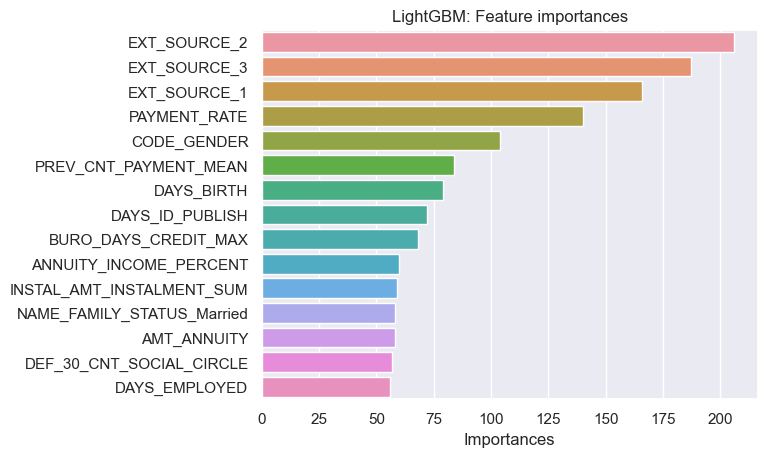

In [55]:
# Get feature importance 15 first values
values = sorted(zip(lgbm_best_model.feature_importances_, features_names), reverse = True)[:15]

# Draw feature importances chart
plt.title("LightGBM: Feature importances")
sns.barplot(x = np.array(list(zip(*values))[0]), y = np.array(list(zip(*values))[1]))
plt.xlabel('Importances')
plt.show()


I also display the feature importances based on the SHAP values (only on the test set!)

In [58]:
test_shap_values = shap_values[1]  # Assurez-vous que shap_values[1] contient les valeurs SHAP que vous souhaitez visualiser
feature_names_list = list(features_names)  # Assurez-vous que features_names contient les noms de vos fonctionnalités


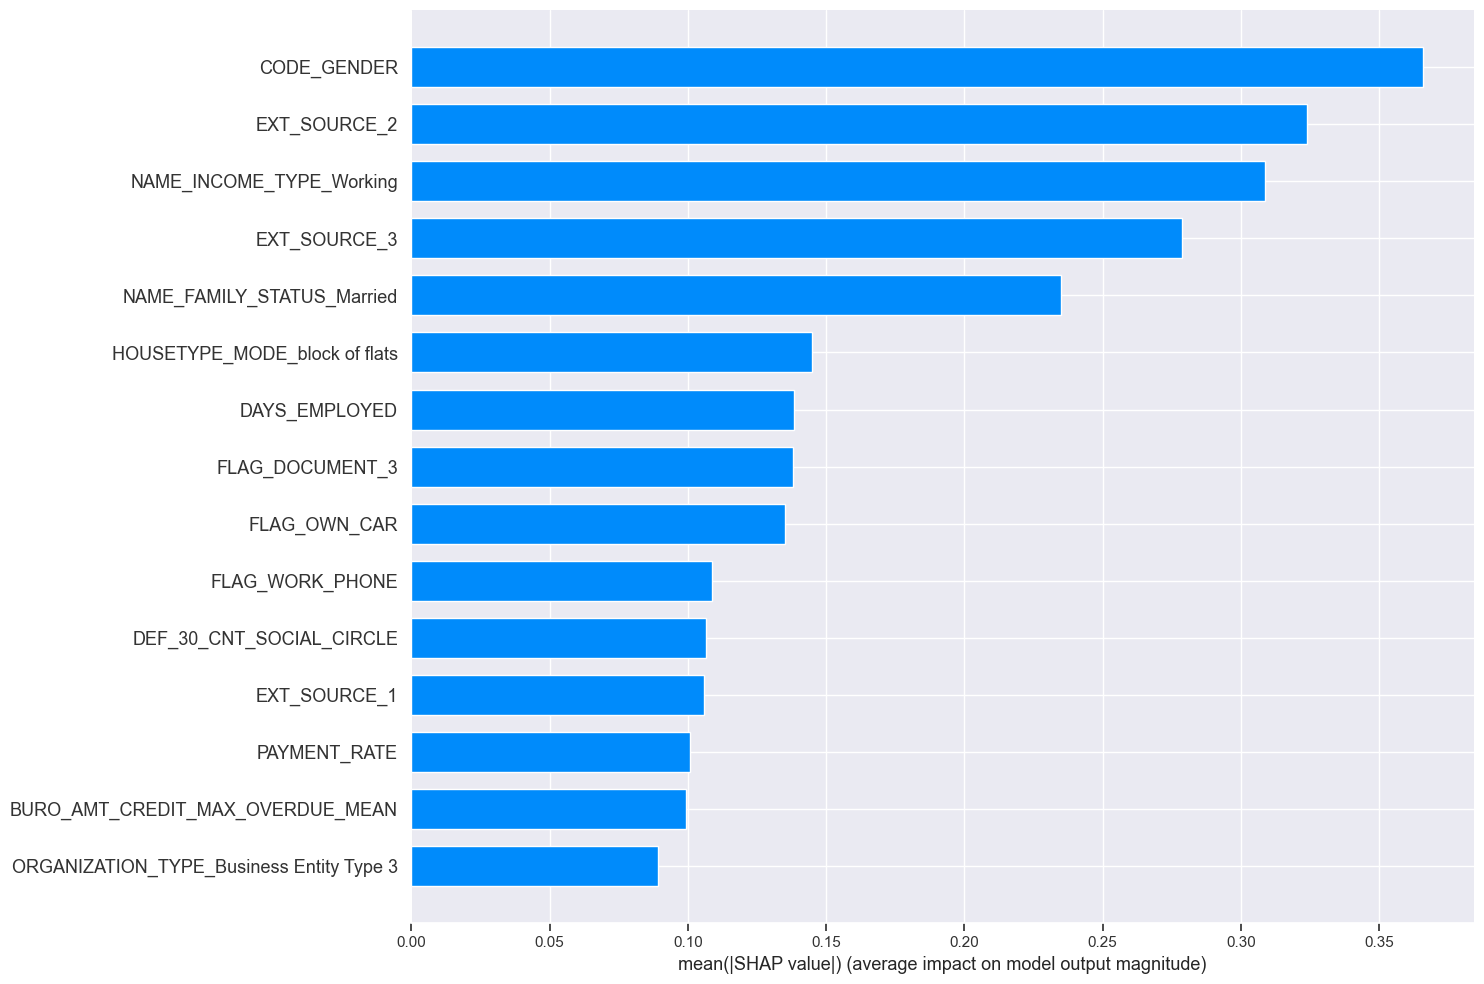

In [59]:
feature_names_list = list(features_names)
shap.summary_plot(test_shap_values, max_display = 15,
                  class_names=['Repay success', 'Repay failure'],
                  plot_type='bar', plot_size = (15,10),
                  title='Feature importances (SHAP values)',
                  feature_names=feature_names_list)


# Export

I export the LightGBM default model (selected as best model)

In [61]:
# Meilleur modèle
best_model = lgbm 

# Sérialiser le modèle
filename = 'Données/lightgbm_classifier.pckl'
pickle.dump(best_model, open(filename, 'wb'))



I export the SHAP explainer based on the LightGBM default model.

In [62]:
# Sérialiser l'expliquer SHAP basé sur le modèle LightGBM

filename = 'Données/lightgbm_shap_explainer.pckl'
pickle.dump(shap_explainer, open(filename, 'wb'))


In [67]:
import joblib

# Pour sauvegarder l'explainer SHAP
joblib.dump(shap_explainer, 'lightgbm_shap_explainer.pkl')

# Pour charger l'explainer SHAP
shap_explainer = joblib.load('lightgbm_shap_explainer.pkl')


In [73]:
import shap

print("SHAP version:", shap.__version__)


SHAP version: 0.42.1


In [76]:
# Récupérer les valeurs d'importance des caractéristiques
import json
feature_importances = sorted(zip(lgbm_best_model.feature_importances_, features_names), reverse=True)

# Convertir les valeurs int32 en int
feature_importances_int = [(int(importance), feature) for importance, feature in feature_importances]

# Exporter les valeurs d'importance des caractéristiques vers un fichier JSON
with open(output_file, 'w') as f:
    json.dump(feature_importances_int, f)

print("Feature importances have been exported to", output_file)


Feature importances have been exported to feature_importances.json
